# Load Libraries

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random
import numpy as np
import time
from IPython.display import display, clear_output
import random

# Load data

In [28]:
from sklearn.datasets import load_iris

In [29]:
data = load_iris()

# Kmeans clustering class

In [49]:
class kMeansClustering:
    def __init__(self, n_cluster,  n_iterations, ntrials = 10):
        self.n_cluster,self.n_iterations, self.ntrials  = n_cluster,  n_iterations, ntrials 
    
    
    def euclidean(self,x1, x2):
        dist = np.linalg.norm(x1- x2)
        return dist
    
    def fit(self, X_data, plot=False, index_plot=[0,1]):
        '''
        X_data (numpy 2d array): dataset
        plot (binary)          : plot during fit?
        index_plot (list)      : which of the feature to plot in 2d
        '''
        n_features = X_data.shape[1]
        cost_store = np.inf
        for trial in range(self.ntrials):
            # Step 1 randomly initialize cetroids
            # this step can be done with taking n specific entry as a whole rather initializing two component independently
            #mu =  [np.array([random.choice(X_data[:,i]) for i in range(n_features)]) for j in range(self.n_cluster)]
            mu =  [np.array([X_data[random.randrange(len(X_data))]]) for j in range(self.n_cluster)]

            for nstep in range(self.n_iterations):
                # Step 2: assign the cluster
                distances = [[self.euclidean(i, j) for j in mu] for i in X_data] 
                ci = [k.index(min(k)) for k in distances]
                mu_ci = [mu[k] for k in ci]

                # Step 3: calculate the centriod
                mu = [np.mean([list(X_data[i,:]) for i in range(len(ci)) if ci[i]==j], axis=0) for j in range(self.n_cluster)]

                cost = 1/ len(X_data) * ( np.square(np.array([min(k) for k in distances])).mean() )
                if cost < cost_store:
                    self.mu = mu
                    self.cost = cost  
                    self.muci =  mu_ci
                    self.ci =  ci
                    cost_store  = cost
                    if plot and len(mu) == self.n_cluster:                    
                        self.plot(X_data,index_plot)
                        clear_output(wait = True)
                        plt.pause(1)
                        
    
    def transform(self,X_data):
        distances = [[self.euclidean(i, j) for j in self.mu] for i in X_data]
        dist = [min(k) for k in distances]
        return dist
    
    def predict(self,X_data):
        distances = [[self.euclidean(i, j) for j in self.mu] for i in X_data] 
        ci = [k.index(min(k)) for k in distances]
        return ci
        
    def plot(self,X_data, index_plot,fig=plt.figure()):
        
        '''
        X_data (numpy 2d array): dataset
        index_plot (list)      : which of the feature to plot in 2d
        '''
        df = [ pd.DataFrame([list(X_data[i,:]) for i in range(len(self.ci)) if self.ci[i]==k]) for k in range(self.n_cluster)]
        color = sns.color_palette("hls", self.n_cluster)
        marker=['X', 'o',  '*','.','^', '<', '>']
#        fig=plt.figure()
        for i in range(self.n_cluster):
            #print(self.mu[i][index_plot[0]],self.mu[i][index_plot[1]])
            plt.scatter(self.mu[i][index_plot[0]],self.mu[i][index_plot[1]], color=color[i], marker=marker[i],  s=500)
            sns.scatterplot(data = df[i], x=index_plot[0], y=index_plot[1],  color=color[i], marker=marker[i])
            plt.text(self.mu[i][index_plot[0]],self.mu[i][index_plot[1]], \
                      '({}, {})'.format(round(self.mu[i][index_plot[0]],2),round(self.mu[i][index_plot[1]],2)))
            plt.title('Cost: %s'%(round(self.cost,4)))
        return fig

<Figure size 640x480 with 0 Axes>

In [31]:
X_data =  data['data'][:,[0,1,2,3]]

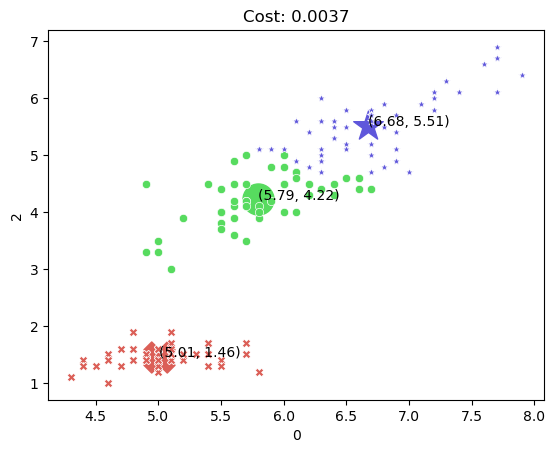

In [55]:
clf =kMeansClustering( n_cluster=3,n_iterations=5, ntrials =3)
clf.fit(X_data, plot=True, index_plot=[0,2])
#clf.fit(X_data)


# Dependence of cost with nclusters

/home/soumen/source/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/soumen/source/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


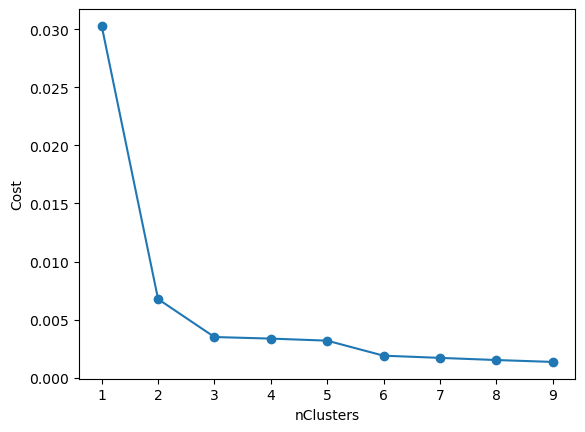

In [7]:
X_data =  data['data']
cost = []
ncls= [1,2,3,4,5,6,7,8,9]
for nclusters in ncls:
    clf =kMeansClustering(n_cluster= nclusters,  n_iterations=10)
    clf.fit(X_data)
    cost.append(clf.cost)
plt.plot(ncls,cost, '-o')
plt.xlabel('nClusters')
plt.ylabel('Cost')

plt.show()

# Example for ncluster = 3

In [ ]:
nclusters = 3
clf =kMeansClustering(n_cluster= nclusters,  n_iterations=10)
clf.fit(X_data, plot=True, index_plot=[0,2])
cost  = clf.cost
print(nclusters,cost)

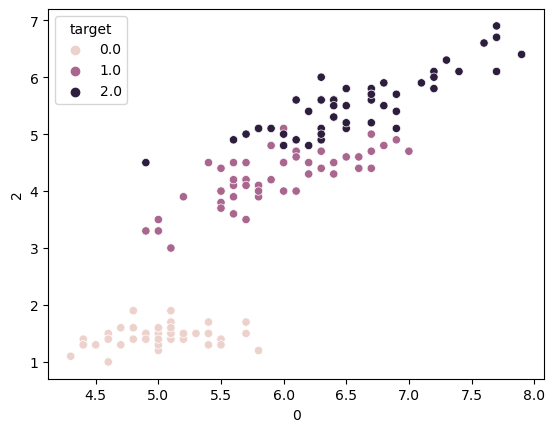

In [16]:
df = pd.DataFrame(np.hstack((data['data'],data['target'].reshape(150,1))),columns=[0,1,2,3,'target'])
sns.scatterplot(data=df,x=0,y=2,hue='target')
plt.show()

# Checking 

In [17]:
clf.mu

[array([5.9016129 , 2.7483871 , 4.39354839, 1.43387097]),
 array([5.006, 3.428, 1.462, 0.246]),
 array([6.85      , 3.07368421, 5.74210526, 2.07105263])]

In [18]:
clf.predict(X_data)[0]

1

In [19]:
X_data[0]

array([5.1, 3.5, 1.4, 0.2])

In [20]:
clf.transform(X_data)[0]

0.14135062787267683

#  voronoi_plot diagram

In [85]:
nclusters = 5
clf =kMeansClustering(n_cluster= nclusters,  n_iterations=10)
clf.fit(X_data)#, plot=True, index_plot=[0,2])

/home/soumen/source/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/soumen/source/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


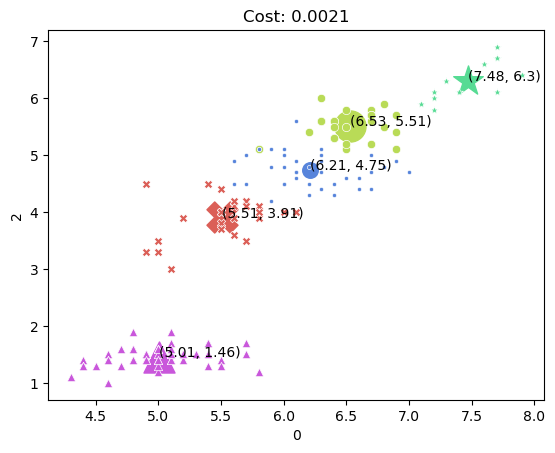

In [86]:
fig = clf.plot(X_data, index_plot=[0,2])

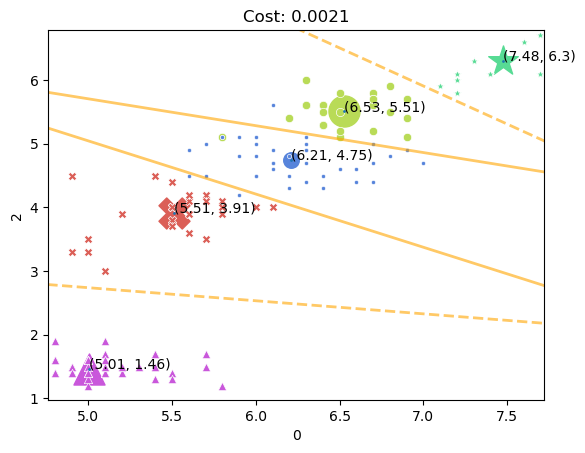

In [87]:
from scipy.spatial import Voronoi, voronoi_plot_2d
points = np.array([[i[0],i[2]] for i in clf.mu])
vor = Voronoi(points)

param = dict(show_vertices=False, line_colors='orange',
                line_width=2, line_alpha=0.6, point_size=2)
fig2 = voronoi_plot_2d(vor, **param)

fig1 = clf.plot(X_data, index_plot=[0,2])
plt.show()
